# Recommender Systems

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import chardet
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

## Loading data

It appears that there is inconsistency in the text encoding used in various data files. As a result, we must verify the encoding to ensure accurate data reading from these files.

In [24]:
def get_file_encoding(file_path):
    """
    This function checks the text enconding used in a particular file
    
    :param file_path: The file path you wish to examine for its encoding
    :return: String containing enconding type
    """
    
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        return result['encoding']

In [25]:
# Loading ratings data
ratings_path = "./ml-1m/ml-1m/ratings.dat"
ratings = pd.read_csv(ratings_path, delimiter="::", header=None, engine='python', encoding=get_file_encoding(ratings_path))
ratings = ratings.rename(columns={0: "UserID", 1: "MovieID", 2: "Rating", 3:"Timestamp"}) # Set ratings column names

ratings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [26]:
#Loading movies data
movies_path = "./ml-1m/ml-1m/movies.dat"
movies = pd.read_csv(movies_path, delimiter="::", header=None, engine='python', encoding= get_file_encoding(movies_path))
movies = movies.rename(columns={0: "MovieID", 1: "Title", 2: "Genres"})

movies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

In [27]:
#Loading users data
users_path = "./ml-1m/ml-1m/users.dat"
users = pd.read_csv(users_path, delimiter="::", header=None, engine='python', encoding= get_file_encoding(users_path))
users = users.rename(columns={0: "UserID", 1: "Gender", 2: "Age", 3: "Occupation", 4: "Zip-code"})

users.head()

UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

## Pre-processing Data

In [28]:
le = LabelEncoder()

In [29]:
unique_users_ids = ratings['UserID'].unique()
# Assuming your movies features matrix is named 'movies_features_df'
filtered_users = users[users['UserID'].isin(unique_users_ids)]

unique_movies_ids = ratings['MovieID'].unique()
# Assuming your movies features matrix is named 'movies_features_df'
filtered_movies = movies[movies['MovieID'].isin(unique_movies_ids)]


filtered_movies.loc[:, 'MovieID'] = le.fit_transform(filtered_movies['MovieID'])
filtered_users.loc[:, 'UserID'] = le.fit_transform(filtered_users['UserID'])

In [101]:
filtered_movies.reset_index(drop=True, inplace=True)
filtered_users.reset_index(drop=True, inplace=True)

In [30]:
user_movie_ratings = ratings.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

In [31]:
# Encode columns (MovieIDs)
user_movie_ratings.columns = le.fit_transform(user_movie_ratings.columns)

# Encode row names (UserIDs)
user_movie_ratings.index = le.fit_transform(user_movie_ratings.index)

# Visualization

## Data preparation

In [74]:
U=read_matrix = np.loadtxt('users_mf.csv', delimiter=',')
M=read_matrix = np.loadtxt('movies_mf.csv', delimiter=',')

In [42]:
#function to categorize years into decades
def categorize_decade(year):
    return f'{year // 10 * 10}s'

In [104]:
movies_df=filtered_movies.copy()
movies_df['Year'] = movies_df['Title'].str.extract(r'\((\d{4})\)')
movies_df=movies_df[['MovieID', 'Genres', 'Year']]
movies_df.loc[:,'Year'] = movies_df.loc[:,'Year'].astype(int)
movies_df.loc[:,'Year'] = movies_df.loc[:,'Year'].astype(int)
movies_df.loc[:,'Decade'] = movies_df.loc[:,'Year'].apply(categorize_decade)


users_df=filtered_users[["UserID", "Gender", "Age"]].copy()

# PCA

## Users

### Gender and Age

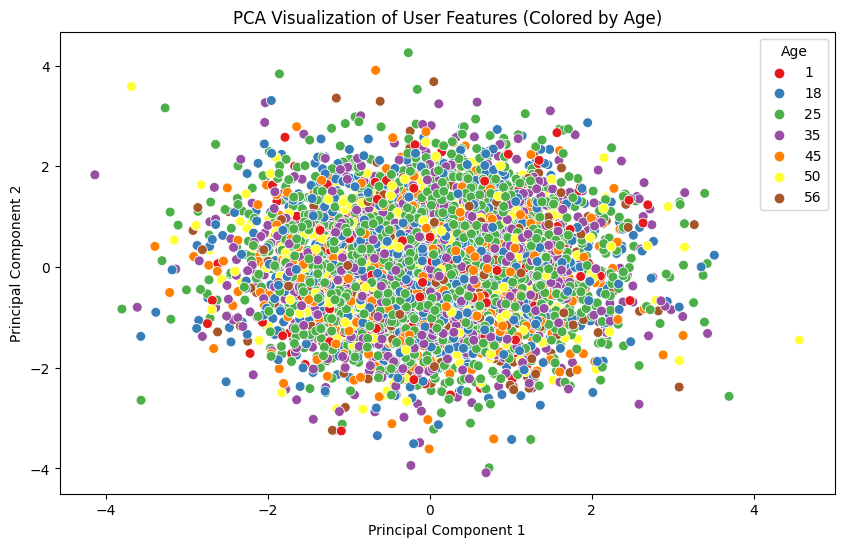

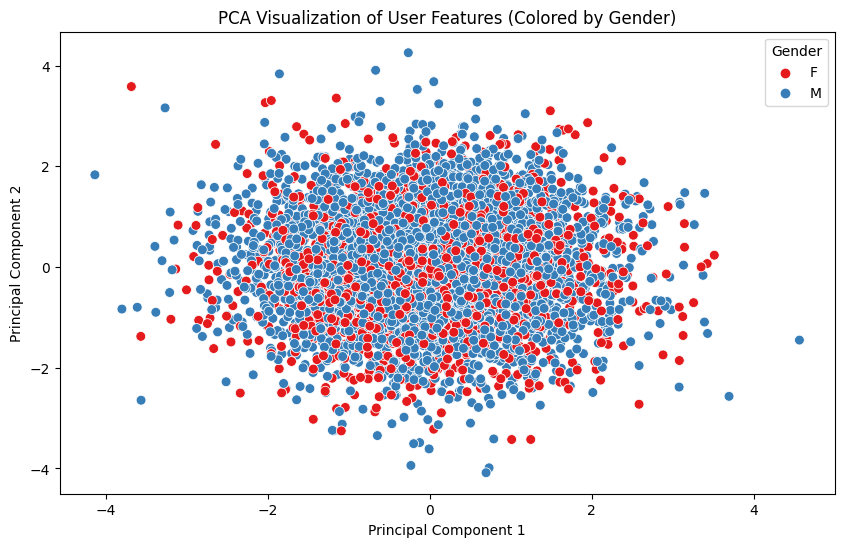

In [121]:
# Apply PCA with 2 components for visualization
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(U)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with user information
final_df = pd.concat([pca_df, users_df[['Gender', 'Age']]], axis=1)

# Visualize using seaborn
# age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Age', data=final_df, palette='Set1', s=50)
plt.title('PCA Visualization of User Features (Colored by Age)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=final_df, palette='Set1', s=50)
plt.title('PCA Visualization of User Features (Colored by Gender)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Movies

### Genre Category and Decade

In [112]:
# Function to categorize genres
def categorize_genre(genre):
    if '|' in genre:
        return 'Combinations'
    elif 'Drama' in genre or 'Comedy' in genre or 'Horror' in genre or 'Thriller' in genre or 'Romance' in genre:
        return 'Major Genre Categories'
    elif 'Children\'s' in genre or 'Animation' in genre:
        return "Children's Genres"
    elif 'Musical' in genre or 'War' in genre or 'Western' in genre or 'Fantasy' in genre or 'Adventure' in genre:
        return 'Special Themes'
    elif 'Sci-Fi' in genre or 'Fantasy' in genre:
        return 'Sci-Fi/Fantasy'
    elif 'Action' in genre or 'Adventure' in genre:
        return 'Action and Adventure'
    else:
        return 'Others'

# Apply the categorize_genre function to the 'Genres' column and create a new column 'Category'
movies_df['Category'] = movies_df['Genres'].apply(categorize_genre)



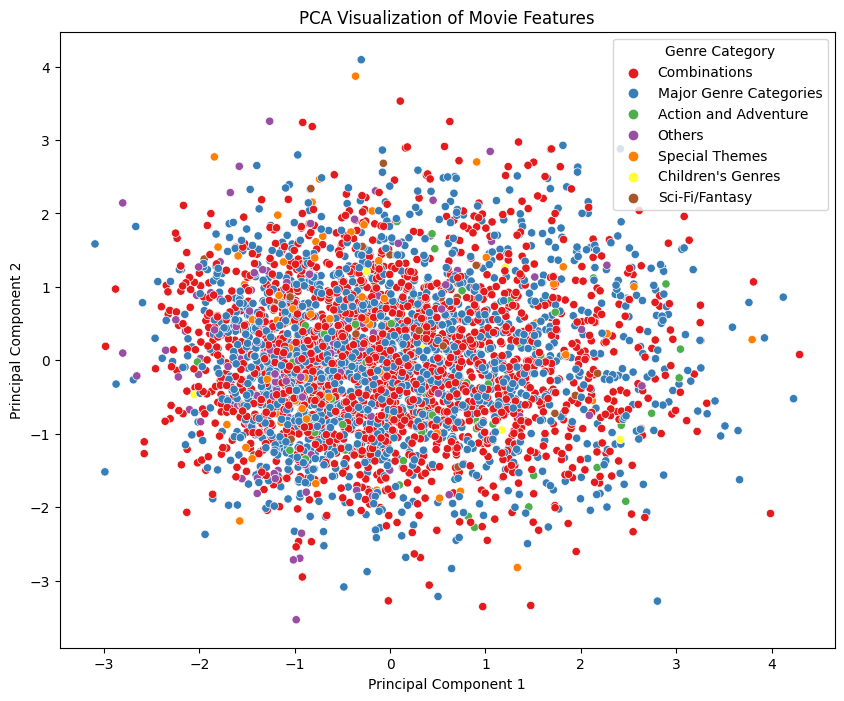

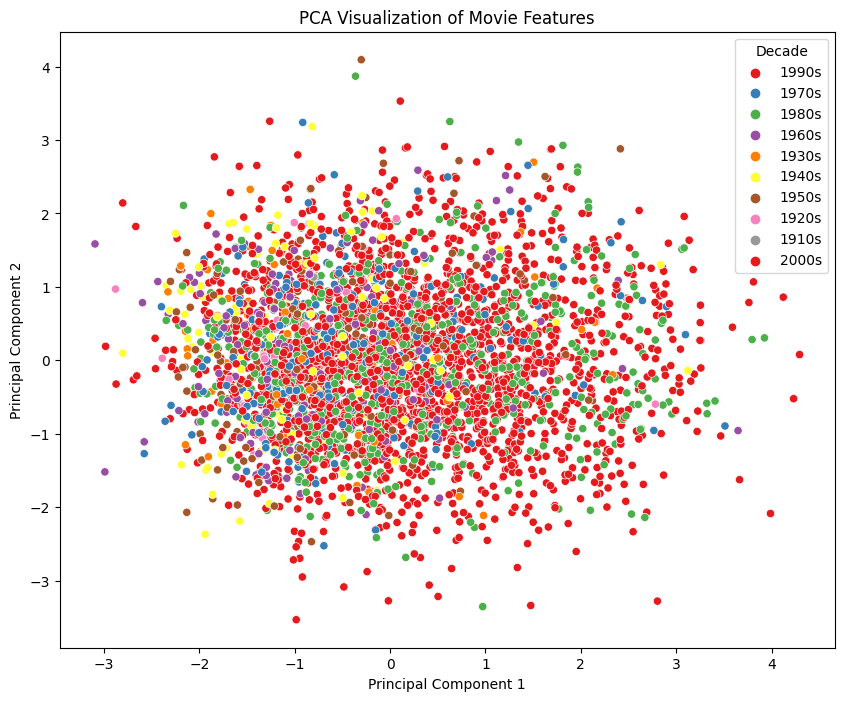

In [126]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(M)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)


pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Extracting genre information for labeling
pca_df['GenreCategory'] = movies_df['Category'].copy()

# Plotting using Seaborn
#genre
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='GenreCategory', data=pca_df, palette='Set1')
plt.title('PCA Visualization of Movie Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre Category')
plt.show()

pca_df['Decade'] = movies_df['Decade']

# Plotting using Seaborn
# decade
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Decade', data=pca_df, palette='Set1', legend='full')
plt.title('PCA Visualization of Movie Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Decade', loc='upper right')
plt.show()



# t-SNE

## Users

  File "C:\Users\myria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


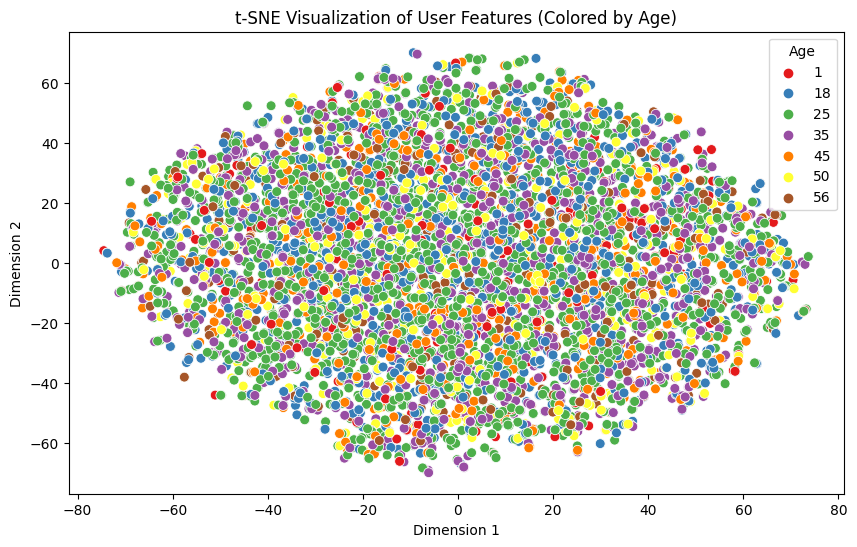

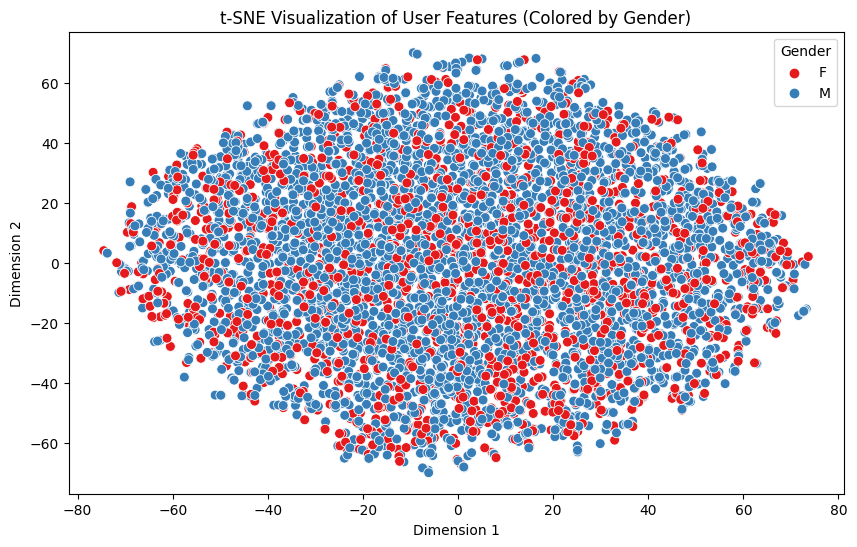

In [127]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(U)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Concatenate t-SNE results with user information
final_tsne_df = pd.concat([tsne_df, users_df[['Gender', 'Age']]], axis=1)

# Visualize using seaborn
# age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Age', data=final_tsne_df, palette='Set1', s=50)
plt.title('t-SNE Visualization of User Features (Colored by Age)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Gender', data=final_tsne_df, palette='Set1', s=50)
plt.title('t-SNE Visualization of User Features (Colored by Gender)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


## Movies

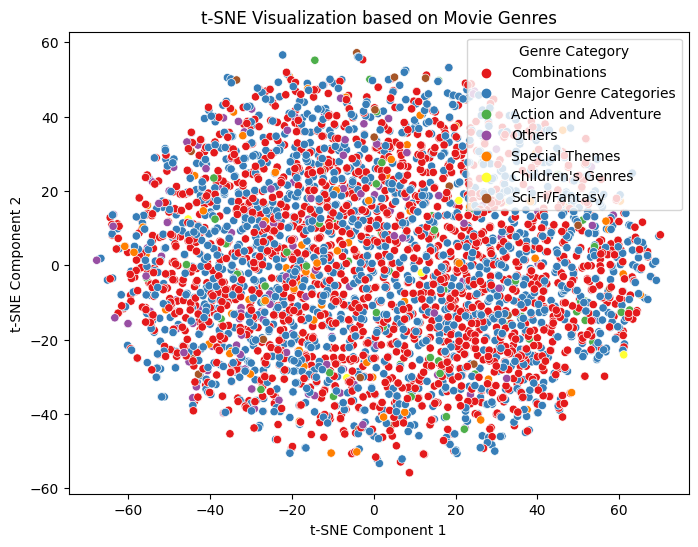

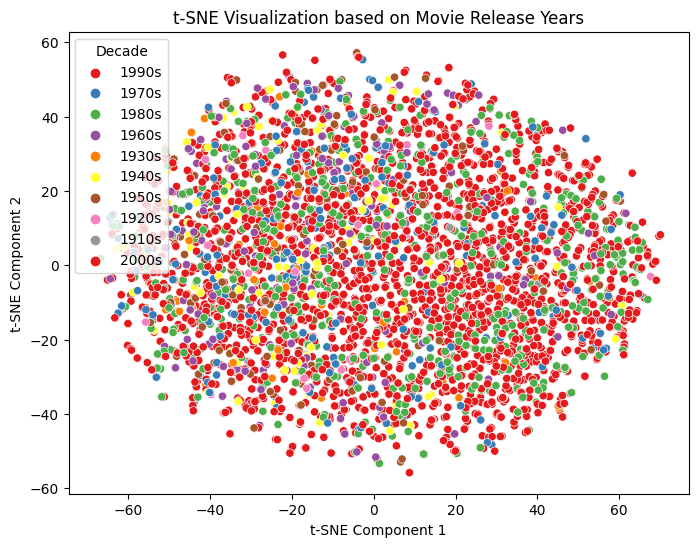

In [130]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(M)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

# Extracting genre and year information for labeling
tsne_df['GenreCategory'] = movies_df['Category']
tsne_df['Decade'] = movies_df['Decade']

# Genre 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='GenreCategory', data=tsne_df, palette='Set1')
plt.title('t-SNE Visualization based on Movie Genres')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Genre Category')
plt.show()

# Year 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Decade', data=tsne_df, palette='Set1')
plt.title('t-SNE Visualization based on Movie Release Years')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Decade')
plt.show()


# UMAP

## Users

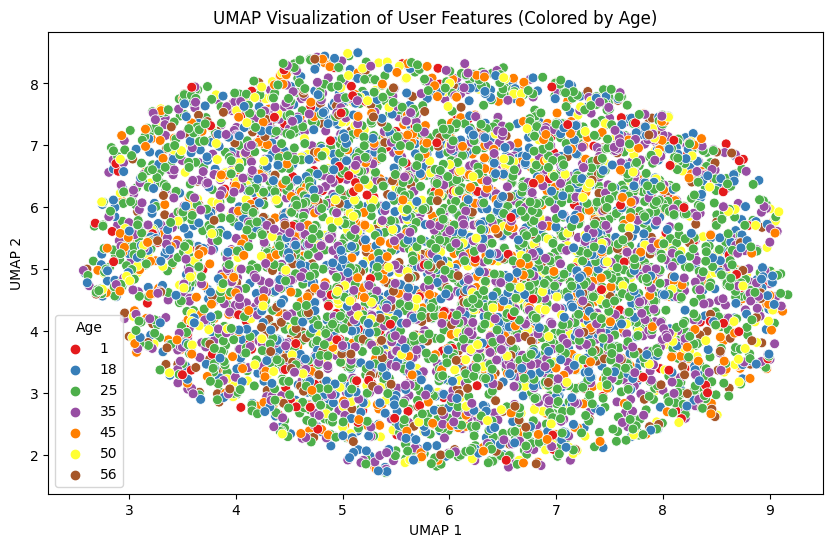

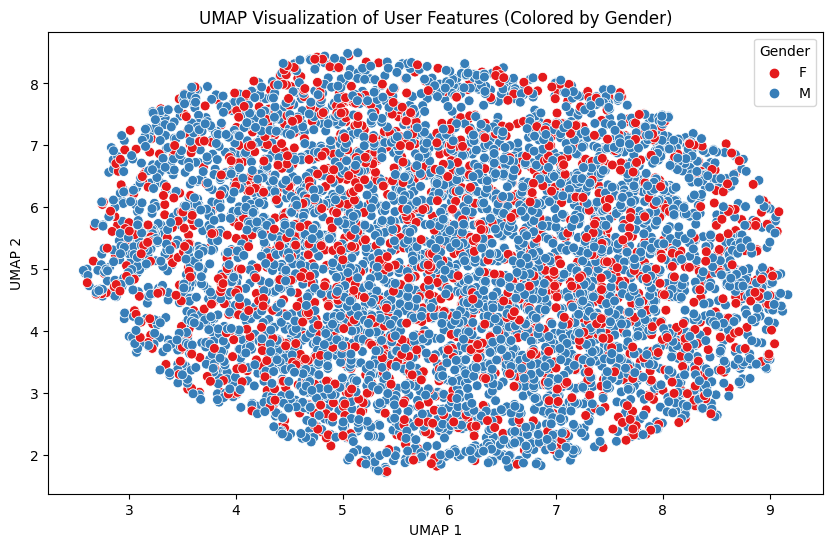

In [55]:
umap_result = umap.UMAP(n_components=2).fit_transform(U)


# Create a DataFrame with UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP 1', 'UMAP 2'])

# Concatenate UMAP results with user information
final_umap_df = pd.concat([umap_df, users_df[['Gender', 'Age']]], axis=1)

# Visualize using seaborn
# age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='Age', data=final_umap_df, palette='Set1', s=50)
plt.title('UMAP Visualization of User Features (Colored by Age)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

# gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='Gender', data=final_umap_df, palette='Set1', s=50)
plt.title('UMAP Visualization of User Features (Colored by Gender)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


## Movies

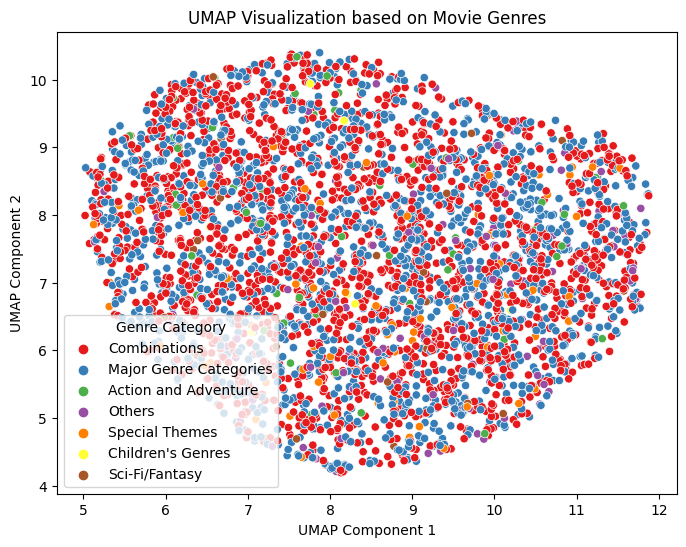

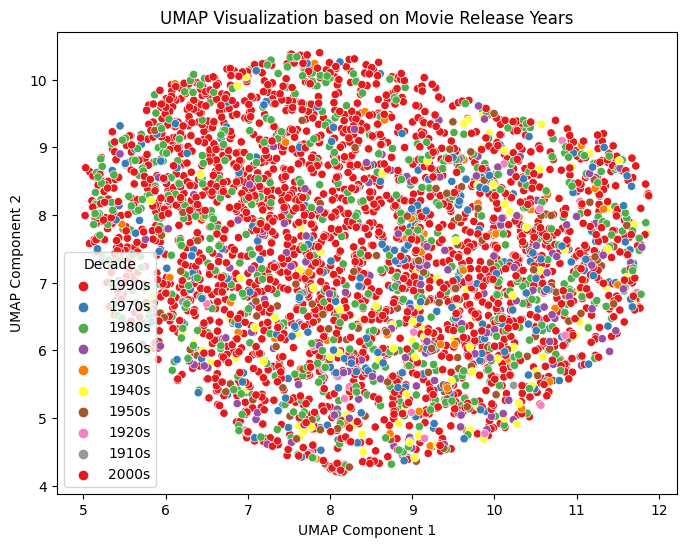

In [129]:
umap_result = umap.UMAP(n_components=2).fit_transform(M)

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Extracting genre and year information for labeling
umap_df['GenreCategory'] = movies_df['Category']
umap_df['Decade'] = movies_df['Decade']

# Plotting based on Genre using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='GenreCategory', data=umap_df, palette='Set1')
plt.title('UMAP Visualization based on Movie Genres')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Genre Category')
plt.show()

# Plotting based on Year using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Decade', data=umap_df, palette='Set1')
plt.title('UMAP Visualization based on Movie Release Years')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Decade')
plt.show()
